In [33]:
# <--- IMPORTAÇÃO DAS BIBLIOTECAS
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix
# --->

In [34]:
# <--- IMPORTAÇÃO DA BASE DE DADOS
dados = pd.read_csv(r'C:\Projetos Data Science\Detecção de Fraude no Cartão de Crédito\Dados\creditcard.csv')
# --->

In [35]:
# <--- EDA: EXPLORATORY DATA ANALYSIS ( ANÁLISE EXPLORATÓRIA DE DADOS)
#       Exploração da base de dados em busca de explorar detalhes ocultos na estrutura dos dados, 
#       identificar falhas ou comportamentos anormais, descobrir tendências e variáveis relevantes 
#       no conjunto e determinar a modelagem formal a ser utilizada.

In [36]:
# Nª DE OPERAÇÕES FRAUDULENTAS E NORMAIS
n_normais = len(dados[dados.Class == 0])
n_fraudes = len(dados[dados.Class == 1])
print('Nº de Operações Normais:', n_normais)
print('Nº de Operações Fraudulentas:', n_fraudes)

Nº de Operações Normais: 284315
Nº de Operações Fraudulentas: 492


In [37]:
# Podemos ver logo de cara uma discrepancia muito grande em ralcação as transações fraudulentas
# e normais.

In [38]:
# DIMENSÃO DOS DADOS
dados.shape

(284807, 31)

In [39]:
# VISUALIZAÇÃO DOS DADOS
dados.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [40]:
# A coluna "Amount" não está padronizada.

In [41]:
# NOMES DAS COLUNAS
dados.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [42]:
# ESTATISTICAS DA BASE DE DADOS
dados.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [43]:
# INFORMAÇÕES SOBRE TIPO DE DADOS, QTD DE DADOS, DADOS NULOS, PRESENTES NA BASE DE DADOS
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [44]:
# ANÁLISE DE DADOS NULOS
dados_nulos = pd.DataFrame(dados.isnull().sum(), columns=['Dados Nulos'])
dados_nulos.loc[dados_nulos['Dados Nulos'] > 0]

,Dados Nulos


In [45]:
# Não foi encontrado a prensença de nenhum dado nulo

In [46]:
# FUNÇÃO DESENVOLVIDA POR MIM PARA ANÁLISAR A DISTRIBUIÇÃO DOS DADOS DE TODA BASE
def DataVisualization(data):
    from math import ceil
    import matplotlib.pyplot as plt
    import seaborn as sns
    columns = 3
    lines = ceil((len(data.columns))/3)
    fig, ax = plt.subplots(figsize=(20, lines*6))
    plt.subplots_adjust(hspace=0.50, wspace=0.15)

    for i in range(len(data.columns)):
        if type(data[data.columns[i]][0]) != str and data[data.columns[i]].nunique() > 2:
            plt.subplot(lines, columns, i+1)
            plt.title((data.columns[i]).upper(), pad=5, size=15, fontdict={'weight': 'bold'})
            plt.hist(data[data.columns[i]])
            plt.yticks(size=15)
        elif type(data[data.columns[i]][0]) == str:
            plt.subplot(lines, columns, i+1)
            plt.title((data.columns[i]).upper(), pad=5, size=15, fontdict={'weight': 'bold'})
            sns.countplot(x=data[data.columns[i]])
            plt.yticks(size=15)
            if data[data.columns[i]].nunique() >= 18:
                plt.xticks(rotation=90, ha='right')
            elif data[data.columns[i]].nunique() >= 10:
                plt.xticks(rotation=30, ha='right')
            elif data[data.columns[i]].nunique() >= 5:
                plt.xticks(rotation=20, ha='right')

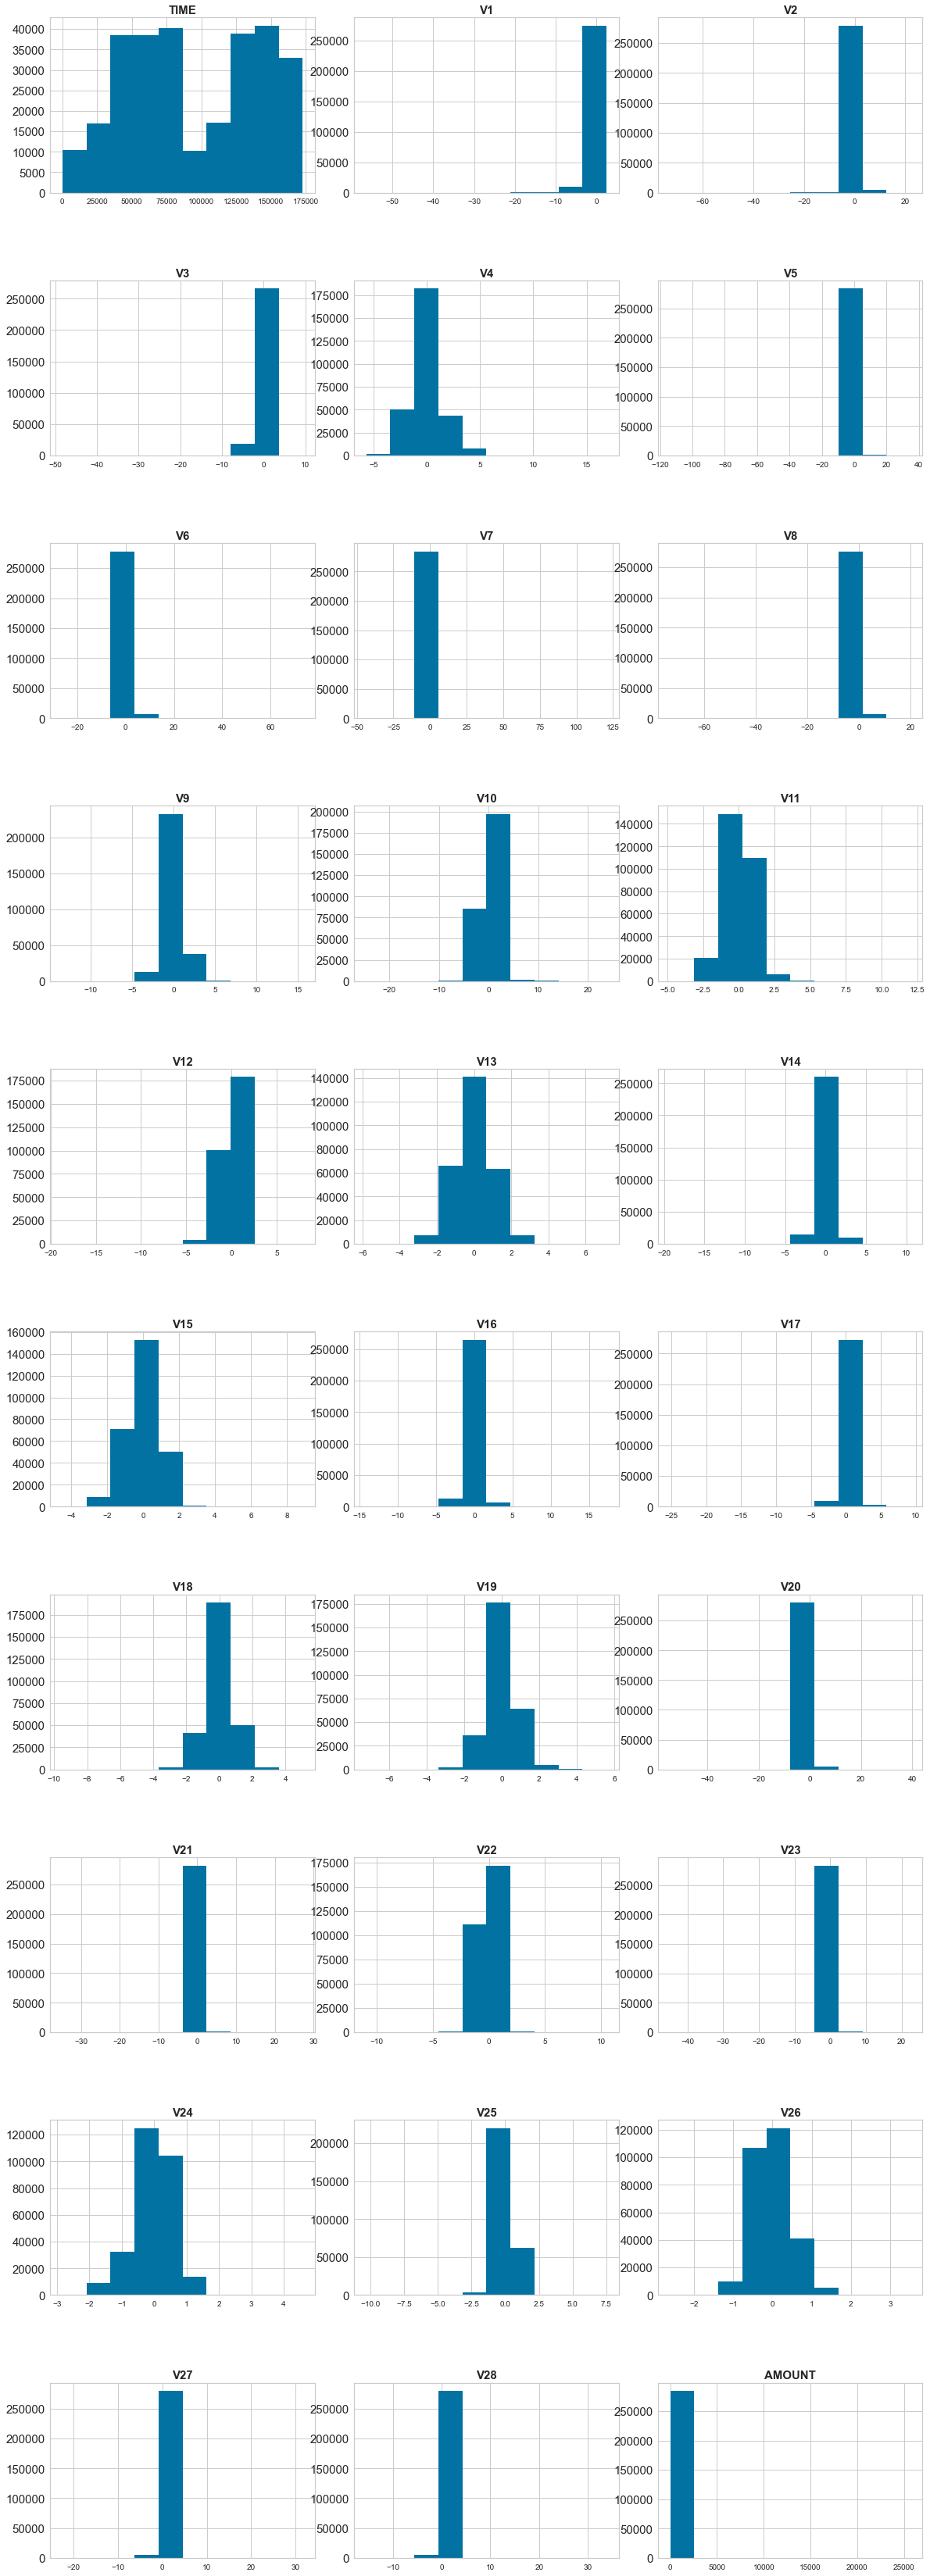

In [47]:
# VISUALIZAÇÃO DA DISTRIBUIÇÃO DOS DADOS
DataVisualization(dados)

In [48]:
# Podemos ver que a maioria dos nossos dados tende a serem normalmente destribuidos.
#
# --->

In [49]:
# <--- LIMPEZA E TRATAMENTO DA BASE DE DADOS
#       Momento que limpamos as colunas que contem varios dados nulos, tratamos as colunas 
#       que contem dado faltantes e concertamos as anomalias para fazer o treinamento do modelo.

In [50]:
# ESCALONAMENTO DOS ATRIBUTOS (STANDARDISATION)
scaler = StandardScaler() 
dados['Amount'] = scaler.fit_transform(dados['Amount'].values.reshape(-1,1)) 

In [51]:
# REMOÇÃO DAS COLUNA TIME (NÃO TEM SERVENTIA PARA O MODELO)
dados = dados.drop(['Time'], axis=1)

In [52]:
# <--- SEPARAÇÃO ENTRE PREVISORES E CLASSE
#       Preparação dos dados para efetuar o treinamento do modelo

In [53]:
# ESTRATIFICANDO A AMOSTRA
operacoes_normais = np.array(np.random.choice(dados[dados.Class == 0].index, n_fraudes, replace=False))
operacoes_fraudulentas = np.array(dados[dados.Class == 1].index)
amostra_indice = np.concatenate([operacoes_normais, operacoes_fraudulentas])
amostra = dados.iloc[amostra_indice, :]

In [54]:
# <-- SEPARAÇÂO DOS DADOS (AMOSTRA)
previsores_amostra = amostra.loc[:, amostra.columns != 'Class'].values
classe_amostra = amostra.loc[:, amostra.columns == 'Class'].values

In [55]:
# <-- DIVIDINDO OS DADOS EM TREINO E TESTE (AMOSTRA)(70%/30%)
X_treinamento_amostra, X_teste_amostra, y_treinamento_amostra, y_teste_amostra = train_test_split(previsores_amostra,
                                                                                                    classe_amostra,
                                                                                                    test_size=0.30,
                                                                                                    random_state=0)
X_teste_amostra   

array([[-1.06866917e+00,  4.01691735e+00, -3.36633430e+00, ...,
         4.72265477e-02,  2.14540025e-01, -3.50150867e-01],
       [-4.69679522e+00,  2.69386748e+00, -4.47513271e+00, ...,
        -1.50845793e+00,  6.08074683e-01, -3.53229393e-01],
       [-8.10020827e-01,  1.60364994e+00, -1.27444296e+00, ...,
         9.28037919e-02, -2.51435138e-03, -3.13288512e-01],
       ...,
       [ 1.18489112e+00,  3.15208421e+00, -6.13477982e+00, ...,
         4.85186935e-01,  3.26551572e-01, -3.53229393e-01],
       [ 9.08636658e-01,  2.84902401e+00, -5.64734296e+00, ...,
         6.48704799e-01,  3.60224330e-01, -3.48511651e-01],
       [ 1.23423505e+00,  3.01974042e+00, -4.30459688e+00, ...,
        -1.00162235e-02,  1.46792735e-01, -3.49231307e-01]])

In [56]:
# Os dados foram separados em Treino e Teste, para que depois possamos fazer a previsão
# utilizando a mesma base de dados.
#
# --->

In [57]:
# <--- CRIANÇÃO DO MODELO
#       Agora vamos criar o modelo para fazer a classificação dos nossos dados de treinamento
#       e, posteriormente fazer a previsão através do nossos dados teste.

In [58]:
# <-- CRIAÇÃO E TREINAMENTO DO MODELO
arvore = DecisionTreeClassifier()
arvore.fit(X_treinamento_amostra, y_treinamento_amostra)

DecisionTreeClassifier()

In [59]:
# <-- PREVISÕES ATRAVÉS DOS DADOS TESTES
previsao = arvore.predict(X_teste_amostra)
previsao

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [60]:
# Nosso modelo foi treinado e testado com os dados a cima.
#
# --->

In [61]:
# <--- AVALIAÇÃO DOS ALGORITOMOS
#       Agora vamos avaliar nosso modelo e ver sua performance para que possamos
#       escolher o melhor modelo

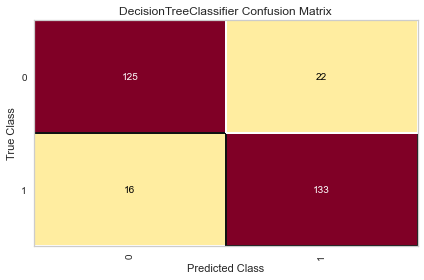

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [62]:
# VISUALIZAÇÃO DA MATRIX DE CONFUSÃO
v = ConfusionMatrix(DecisionTreeClassifier())
v.fit(X_treinamento_amostra, y_treinamento_amostra)
v.score(X_teste_amostra, y_teste_amostra)
v.poof()

In [63]:
# FUNÇÃO DESENVOLVIDA POR MIM PARA AVALIAÇÃO DO MODELO
def ModelEvaluation(modelo, X_teste, y_teste, predict):
    import matplotlib.pyplot as plt
    from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve
    acuracia = accuracy_score(y_teste, predict)
    precisao = precision_score(y_teste, predict)
    recall = recall_score(y_teste, predict)
    f1 = f1_score(y_teste, predict)
    print(f'ACURÁCIA:\t{acuracia}\nPRECISÃO:\t{precisao}\nRECALL:\t\t{recall}\nF1 SCORE:\t{f1}\n\n GRÁFICO DA CURVA DE ROC')
    modelo_prob = modelo.predict_proba(X_teste)
    probs = modelo_prob[:, 1]
    rfp, rvp, lim = roc_curve(y_teste, probs)
    plt.plot(rfp, rvp, marker='.', label=modelo,color="orange")
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Especificidade')
    plt.ylabel('Sensibilidade')
    plt.legend()
    plt.show()

ACURÁCIA:	0.875
PRECISÃO:	0.868421052631579
RECALL:		0.8859060402684564
F1 SCORE:	0.8770764119601329

 GRÁFICO DA CURVA DE ROC


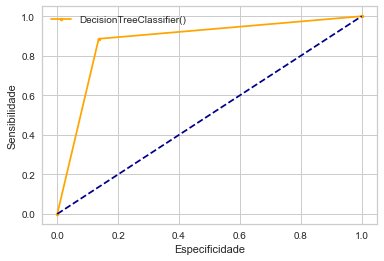

In [64]:
# VISUALIZAÇÃO DA AVALIAÇÃO DO MODELO
ModelEvaluation(arvore, X_teste_amostra, y_teste_amostra, previsao)